### Swati Dogra - DSC 680  - Project 2 - Final Milestone

#### House Price Prediction Model 

##### Import the necessary libraries

Used the Kaggle House Prices dataset (Kaggle, 2019), which contains features such as building class, zoning, house style, lot area, year built, sale condition and more

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from datetime import timedelta
import matplotlib.dates as mdates

# Load housing price data
data = pd.read_csv('C:/Users/swati/OneDrive/Desktop/Swati/Bellevue/DSC 680/Project 2/train.csv')


#### Exploratory Data Analysis (EDA) - Data Overview

In [70]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Display the first few rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
# Display summary statistics for numerical features
print(data.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [72]:
# Display data types and missing values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [73]:
# Display features with missing values
missing_values = data.isnull().mean() * 100
print(missing_values[missing_values > 0].sort_values(ascending=False))

# Fill missing values with appropriate methods
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['Alley'].fillna('None', inplace=True)
data['BsmtQual'].fillna('TA', inplace=True)
# We can repeat this for other features as necessary


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


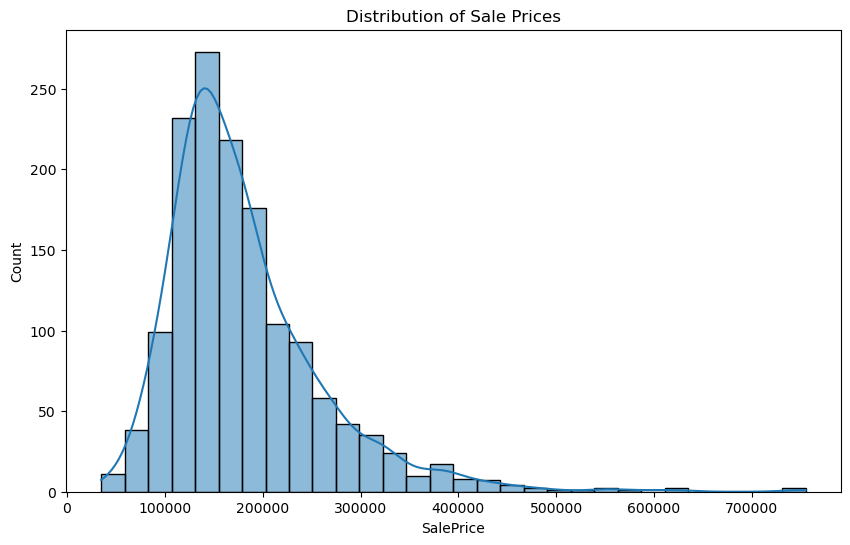

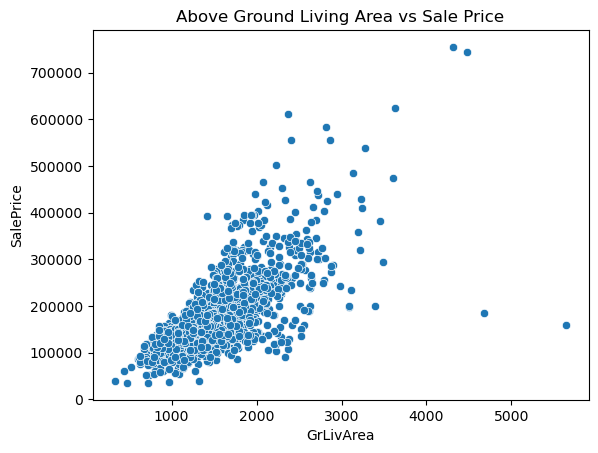

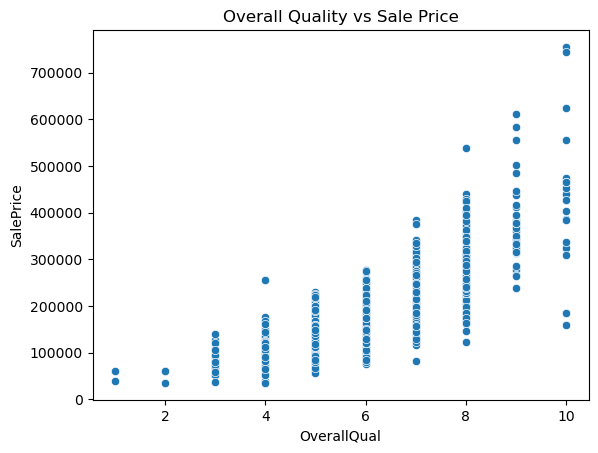

In [74]:
# Distribution of Sale Price
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.show()


# Scatter plots of important features
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('Above Ground Living Area vs Sale Price')
plt.show()

sns.scatterplot(x='OverallQual', y='SalePrice', data=data)
plt.title('Overall Quality vs Sale Price')
plt.show()


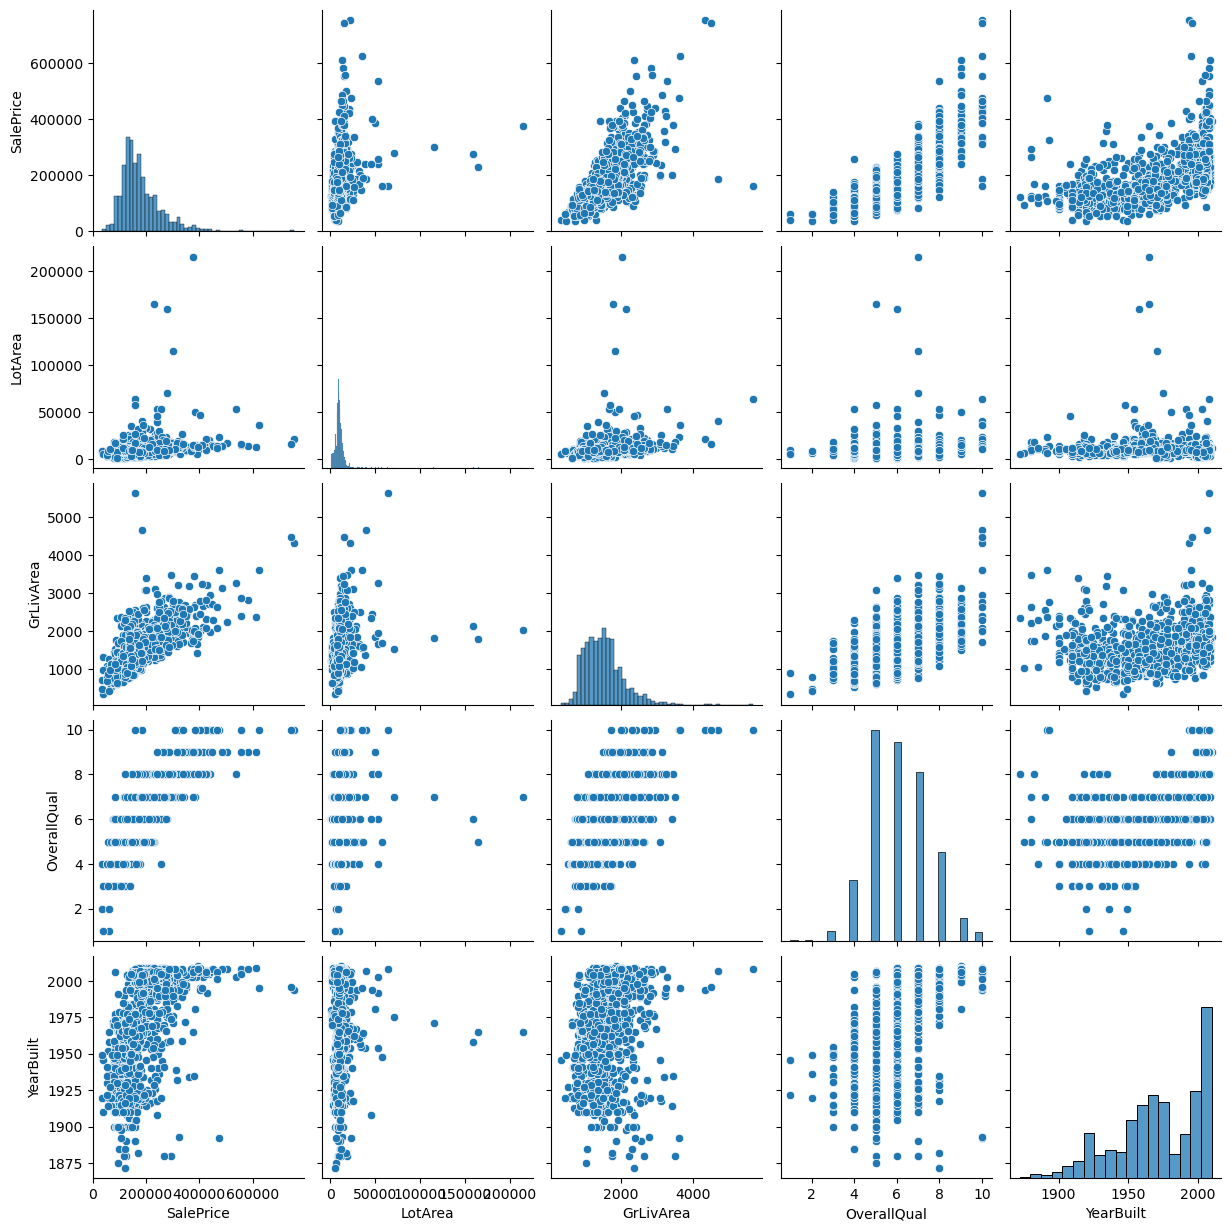

In [75]:
# Pairplot of numerical features
sns.pairplot(data[['SalePrice', 'LotArea', 'GrLivArea', 'OverallQual', 'YearBuilt']])
plt.show()

##### Categorical Data Visualization

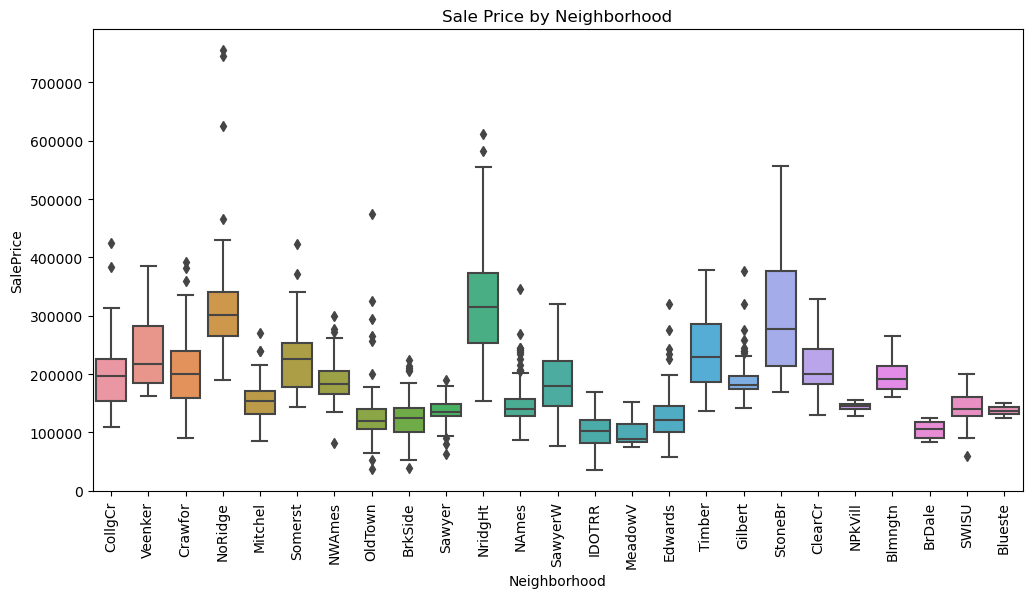

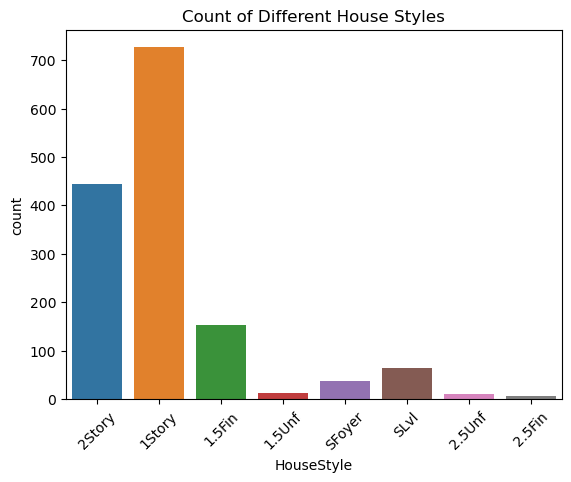

In [77]:
# Visualize categorical data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
plt.title('Sale Price by Neighborhood')
plt.xticks(rotation=90)
plt.show()

# Count plots for categorical variables
sns.countplot(x='HouseStyle', data=data)
plt.title('Count of Different House Styles')
plt.xticks(rotation=45)
plt.show()


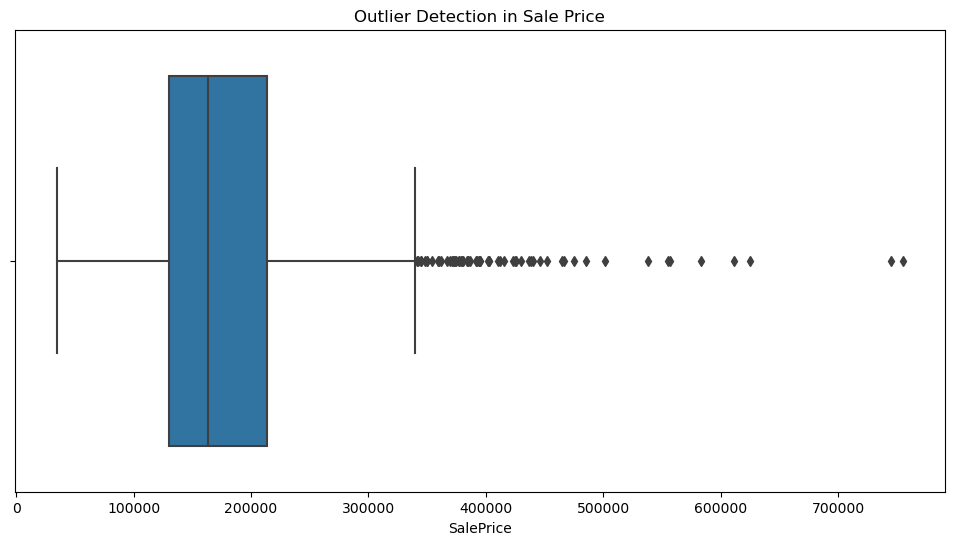

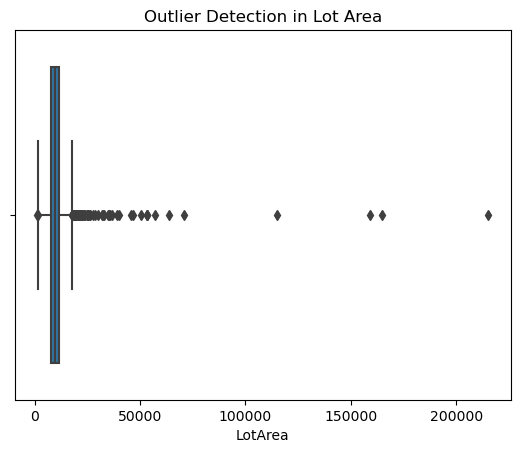

In [78]:
# Identify outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='SalePrice', data=data)
plt.title('Outlier Detection in Sale Price')
plt.show()

# Additional outlier detection for other numerical features
sns.boxplot(x='LotArea', data=data)
plt.title('Outlier Detection in Lot Area')
plt.show()


#### Feature Engineering

In [80]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Create new features
data['PricePerSf'] = data['SalePrice'] / data['GrLivArea']
data['TotalBathrooms'] = data['FullBath'] + (0.5 * data['HalfBath'])

# Separate numerical and categorical features
numeric_features = ['LotArea', 'YearBuilt', 'GrLivArea', 'TotalBsmtSF']
categorical_features = ['MSZoning', 'Street', 'Neighborhood', 'HouseStyle']

# Define transformers - Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


######
The ultimate goal here is to clean and prepare your data for model training, ensuring that both numerical and categorical features are handled appropriately.
First, you create new features based on existing columns in your dataset. For example, we calculate PricePerSf by dividing the sale price by the living area, and TotalBathrooms by combining full and half bathrooms.

Next, we identify which features are numerical (like lot area, year built, living area, and total basement square footage) and which are categorical (like zoning, street, neighborhood, and house style).

To handle these different types of data, we set up transformers—essentially pipelines that specify the steps for preprocessing. For numerical features, you first fill in missing values using the median, then scale the features to standardize them. For categorical features, you fill in missing values with the most frequent category and then apply one-hot encoding, which converts categorical values into a format that can be provided to machine learning algorithms to do a better job in prediction.

Finally, we combine these transformers into a single preprocessor using ColumnTransformer, which allows to apply different transformations to different subsets of your data in a streamlined way. This preprocessor will ensure that numerical and categorical features are prepared correctly before feeding the data into machine learning models.

#### Model Building

In [83]:
# Define the target variable and features
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


######

Identified your target variable, which is SalePrice, the value we're aiming to predict. We've also defined your feature set, X, by dropping the SalePrice column from data. This leaves with all the other features in dataset that will be used to make predictions.

To train and evaluate your model, split your data into training and test sets using train_test_split from sklearn. By specifying a test_size of 0.2, we're allocating 80% of  data to the training set and 20% to the test set. The random_state parameter ensures that data is split in a reproducible way, meaning we'll get the same split every time you run this code.

This step is crucial for building a robust model, as it allows to train your model on one portion of the data and test its performance on another, helping to prevent overfitting.

##### Train models

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = {'MAE': mae, 'RMSE': rmse}

print(results)


{'Linear Regression': {'MAE': 24466.165124347503, 'RMSE': 39212.99710115704}, 'Random Forest': {'MAE': 20245.410644977168, 'RMSE': 30299.100928397424}, 'Gradient Boosting': {'MAE': 20176.796256270187, 'RMSE': 30394.174193410166}}


######

We are importing three different regression models: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor. Also import metrics to evaluate the performance of these models, specifically Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

We define a dictionary of models, where each key-value pair represents a model name and its corresponding instance.

In the training and evaluation loop, create a pipeline for each model that includes the preprocessor and the model itself. This pipeline ensures that the preprocessing steps are applied consistently across all models. For each model, fit the pipeline on the training data and then make predictions on the test data. We calculate the MAE and RMSE for each model’s predictions, storing these values in a results dictionary.

Finally, we print the results, which gives you a clear comparison of how each model performed in terms of MAE and RMSE. This helps to easily identify which model is the most effective for your particular dataset.

##### Model Evaluation

In [89]:
# Print model performance
for name, metrics in results.items():
    print(f"{name} - MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}")


Linear Regression - MAE: 24466.165124347503, RMSE: 39212.99710115704
Random Forest - MAE: 20245.410644977168, RMSE: 30299.100928397424
Gradient Boosting - MAE: 20176.796256270187, RMSE: 30394.174193410166


######

Linear Regression has an MAE of approximately 24,466 and an RMSE of approximately 39,213.

Random Forest has an MAE of approximately 20,245 and an RMSE of approximately 30,299.

Gradient Boosting has an MAE of approximately 20,177 and an RMSE of approximately 30,394.

By comparing these values, we can gauge which model performs best on your data. The lower the MAE and RMSE, the better the model is at making predictions.

###### HyperParameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting (example)
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7]
}

# Perform grid search for the best Gradient Boosting model
grid_search = GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor), ('model', GradientBoostingRegressor())]), 
                           param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Update best model
best_model_pipe = grid_search.best_estimator_


######

We've set up a grid search to find the best hyperparameters for the Gradient Boosting Regressor. The param_grid defines the parameters you want to tune—in this case, the number of estimators (n_estimators) and the maximum depth of the trees (max_depth).

The GridSearchCV function is used to perform an exhaustive search over the specified parameter grid. It will test different combinations of the hyperparameters using cross-validation (cv=5), which helps in finding the most optimal set of parameters. By setting n_jobs=-1, allows the search to use all available processors, speeding up the process.

The grid search is performed on a pipeline that includes both preprocessor and the Gradient Boosting model, ensuring that the preprocessing steps are consistently applied across all parameter combinations tested. Once the grid search is complete, the best model is selected and updated (best_model_pipe) with the optimal hyperparameters.

This approach is powerful for enhancing model performance and ensuring we get the best out of your Gradient Boosting model.

###### Models Evaluation

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train models and store predictions
predictions = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    predictions[name] = y_pred
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name} - MAE: {mae}, RMSE: {rmse}")


Linear Regression - MAE: 24466.165124347503, RMSE: 39212.99710115704
Random Forest - MAE: 20245.410644977168, RMSE: 30299.100928397424
Gradient Boosting - MAE: 20176.796256270187, RMSE: 30394.174193410166


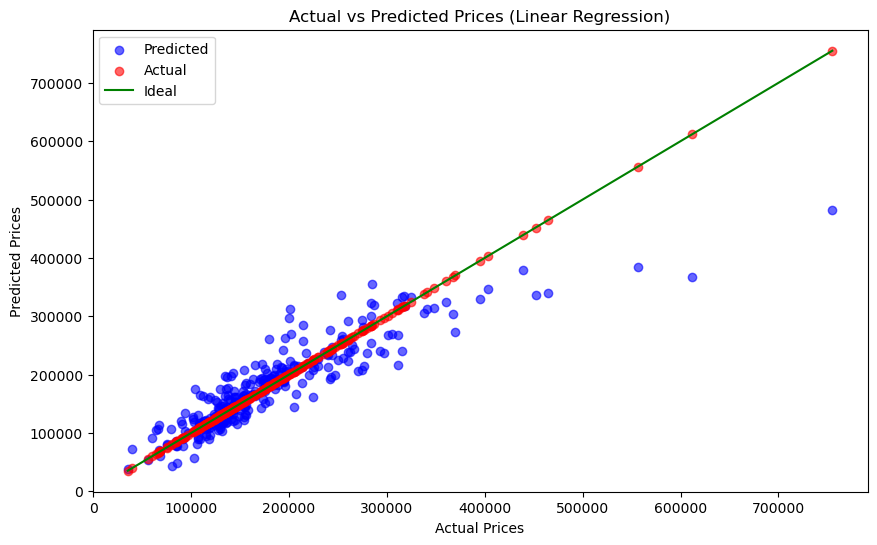

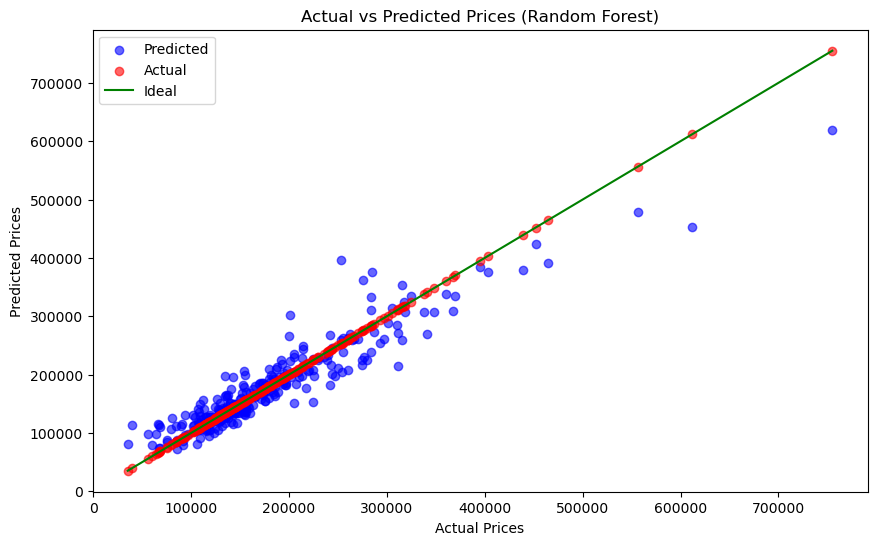

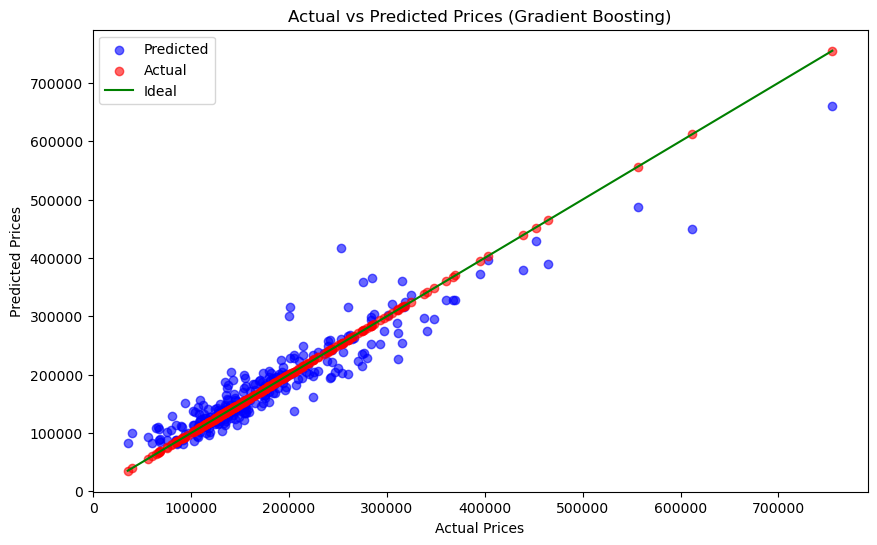

In [96]:
import matplotlib.pyplot as plt

def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted', color='blue')
    plt.scatter(y_test, y_test, alpha=0.6, label='Actual', color='red')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices ({model_name})')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', label='Ideal')
    plt.legend()
    plt.show()

# Plot for each model
for name, y_pred in predictions.items():
    plot_actual_vs_predicted(y_test, y_pred, name)


In [97]:
# Define models with regularization
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    results[name] = {'MAE': -scores.mean()}

print(results)

{'Linear Regression': {'MAE': 24171.334714616714}, 'Lasso Regression': {'MAE': 24172.36085632201}, 'Ridge Regression': {'MAE': 24002.81298791242}, 'Random Forest': {'MAE': 21835.55101177157}, 'Gradient Boosting': {'MAE': 21787.16993536565}}


######

We're enhancing your model evaluation process by introducing regularization techniques and using cross-validation. Here's a summary:

We've defined a variety of models, including regularization methods such as Lasso and Ridge Regression, along with Linear Regression, Random Forest, and Gradient Boosting.

To evaluate the performance of these models, use cross-validation. This technique splits your training data into multiple folds and trains the model on different subsets of the data, ensuring a more robust evaluation. Specifically, you use 5-fold cross-validation (cv=5) and the Mean Absolute Error (MAE) as the scoring metric.

Create a pipeline for each model that includes the preprocessor and the model itself. For each model, calculate the cross-validated MAE scores and store the mean value in the results dictionary. This provides you with a reliable estimate of how each model is expected to perform on unseen data.

This approach not only introduces regularization techniques to potentially improve model performance but also leverages cross-validation to ensure a more accurate and reliable evaluation of models.

In [99]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest with pruning
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Perform grid search for the best Random Forest model with pruning
grid_search_rf = GridSearchCV(Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))]),
                              param_grid_rf, cv=5, n_jobs=-1, error_score='raise')

try:
    grid_search_rf.fit(X_train, y_train)
    best_rf_model_pipe = grid_search_rf.best_estimator_
    print(f"Best parameters: {grid_search_rf.best_params_}")
    y_pred = best_rf_model_pipe.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Best model performance - MAE: {mae}, RMSE: {rmse}")
except Exception as e:
    print(f"An error occurred: {e}")


Best parameters: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 300}
Best model performance - MAE: 20167.075267162767, RMSE: 31057.751742620996


######

In this specific case, the best hyperparameters are:

max_depth: 20

min_samples_leaf: 1

min_samples_split: 5

n_estimators: 300

The performance of the best model is:

MAE: 20,167.08

RMSE: 31,057.75

This process helps fine-tune the Random Forest model to achieve better performance by finding the most effective hyperparameters.

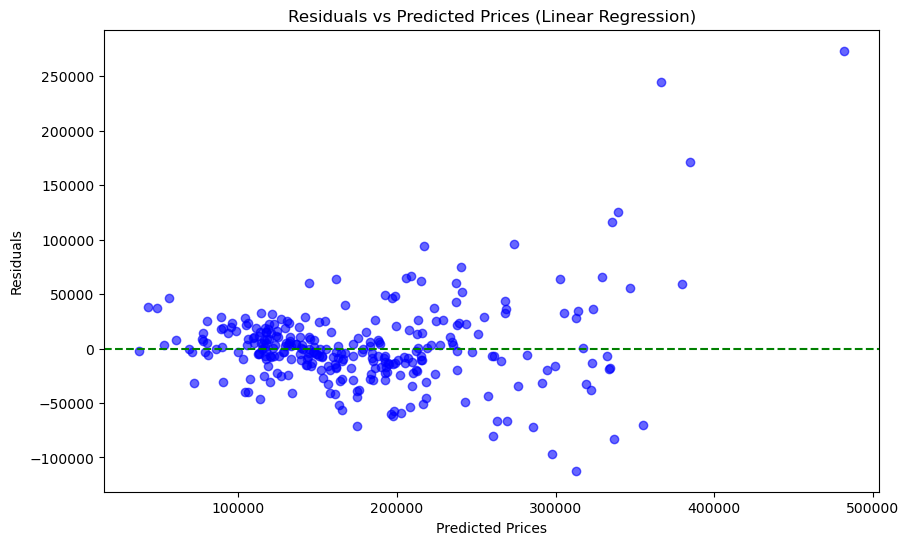

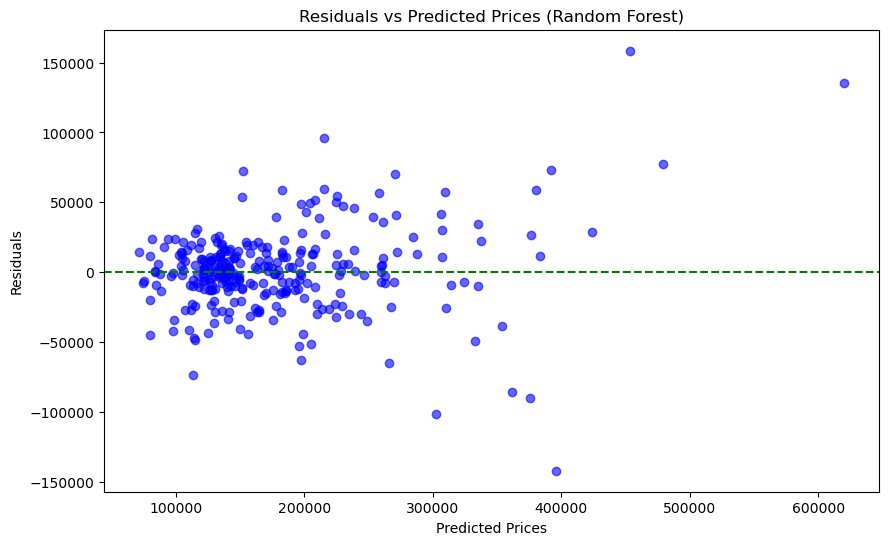

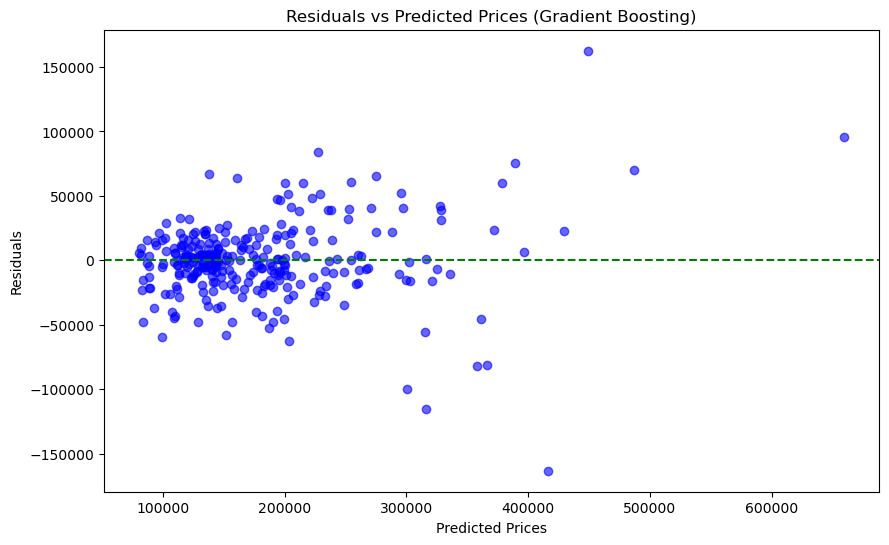

In [101]:
import matplotlib.pyplot as plt

def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
    plt.axhline(y=0, color='green', linestyle='--')
    plt.xlabel('Predicted Prices')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Prices ({model_name})')
    plt.show()

# Plot for each model
for name, y_pred in predictions.items():
    plot_residuals(y_test, y_pred, name)


######

Residuals and predicted prices are essential concepts in evaluating the performance of regression models.

Predicted Prices: These are the values generated by regression model when it makes predictions based on the features in your dataset. They represent the model's best estimate of the target variable—in this case, SalePrice.

Residuals: The residuals are the differences between the actual observed values (y_test) and the predicted values (y_pred). 

Mathematically, a residual is calculated as:

Residual = Actual Value − Predicted Value

As the residuals are randomly scattered with no clear pattern, it indicates that the model's predictions are generally accurate and the errors are due to natural variability rather than systematic bias. This randomness suggests that the model's errors are evenly distributed and not biased towards overestimating or underestimating the target values.

